C:\Users\Raysh\AppData\Local\Temp\ipykernel_9160\3719802191.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster'] = clusters
C:\Users\Raysh\AppData\Local\Temp\ipykernel_9160\3719802191.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster_size'] = filtered_df['cluster'].map(cluster_counts)


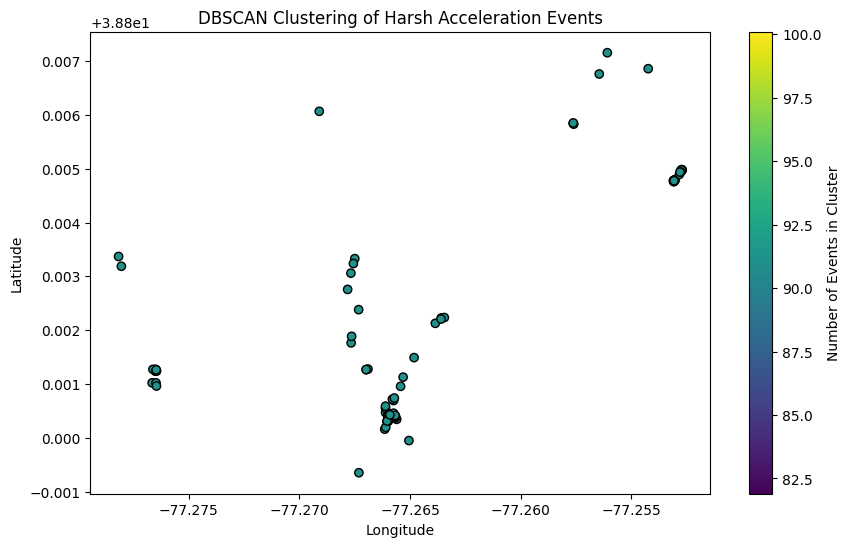

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import MarkerCluster

# Load your dataset
df = pd.read_csv(r'C:\Users\Raysh\Documents\LakebraddockSecondary_Schoolcleaned_modified.csv')

# Filter the events where accelerationx >= 4.0
filtered_df = df[df['accelerationx'] >= 4.0]

# Select the features you want to use for clustering
X = filtered_df[['accelerationx']]
coordinates = filtered_df[['latitude', 'longitude']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1, min_samples=1000)
clusters = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
filtered_df['cluster'] = clusters

# Count the number of events in each cluster
cluster_counts = filtered_df['cluster'].value_counts()
filtered_df['cluster_size'] = filtered_df['cluster'].map(cluster_counts)

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(filtered_df['longitude'], filtered_df['latitude'], c=filtered_df['cluster_size'], cmap='viridis', edgecolor='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Harsh Acceleration Events')
cbar = plt.colorbar(scatter, label='Number of Events in Cluster')
plt.show()

# Create a map centered around the mean of your latitude and longitude
map_center = [filtered_df['latitude'].mean(), filtered_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=14)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the map
for _, row in filtered_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f'Cluster: {row["cluster"]}, Size: {row["cluster_size"]}',
        icon=folium.Icon(color='blue' if row['cluster'] >= 0 else 'red')
    ).add_to(marker_cluster)

# Save the map as an HTML file
m.save('dbscan_clusters_map.html')

# If you are in a Jupyter notebook or similar environment, display the map
m



In [8]:
import folium
from folium.plugins import MarkerCluster

def save_interactive_map(df, filename='dbscan_clusters_map.html'):
    # Create a map centered around the mean of your latitude and longitude
    map_center = [df['latitude'].mean(), df['longitude'].mean()]
    m = folium.Map(location=map_center, zoom_start=14)

    # Create a marker cluster
    marker_cluster = MarkerCluster().add_to(m)

    # Add markers to the map
    for _, row in df.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f'Cluster: {row["cluster"]}, Size: {row["cluster_size"]}',
            icon=folium.Icon(color='blue' if row['cluster'] >= 0 else 'red')
        ).add_to(marker_cluster)

    # Save the map as an HTML file
    m.save(filename)
    print(f"Map has been saved as {filename}")

# Example usage:
save_interactive_map(filtered_df, 'harsh_acceleration_map.html')


Map has been saved as harsh_acceleration_map.html


In [7]:
import os
os.chdir(("C:\\Users\Raysh\\.vscode"))

<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Raysh\AppData\Local\Temp\ipykernel_9160\165333823.py:2: SyntaxWarning: invalid escape sequence '\R'
  os.chdir(("C:\\Users\Raysh\\.vscode"))
